In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2
import dbconfig as cfg

In [2]:
user = cfg.mysql['user']
pwd = cfg.mysql['passwd']
hostPort = cfg.mysql['host']
database = cfg.mysql['db']

In [3]:
engine = create_engine(f"postgresql+psycopg2://{user}:{pwd}@{hostPort}/{database}")
conn = engine.connect()

In [4]:
# Query Records for salaries in the Database
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117.0,1986-06-26,1987-06-26
1,10002,65828.0,1996-08-03,1997-08-03
2,10003,40006.0,1995-12-03,1996-12-02
3,10004,40054.0,1986-12-01,1987-12-01
4,10005,78228.0,1989-09-12,1990-09-12


In [5]:
# Query Records for titles in the Database
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [6]:
# Merge both tables, salries and titles
salaries_titles = pd.merge(salaries, titles, on="emp_no")
avgSalary = salaries_titles.groupby(['title']).mean().sort_values('salary')
avgSalary.head(10)

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Senior Engineer,253034.375949,48506.751806
Engineer,252943.159987,48539.781423
Technique Leader,251708.951052,48580.505772
Manager,110780.833333,51531.041667
Staff,253399.240672,58465.271904
Senior Staff,253423.367183,58503.286614


(40000, 60000)

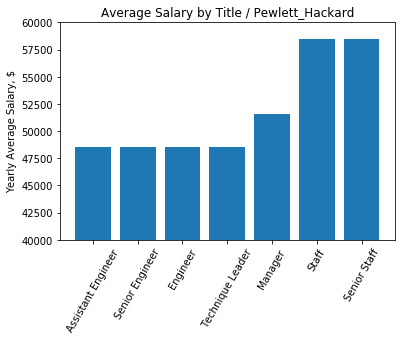

In [7]:
# Create a bar chart of average salary by title.
titles = list(avgSalary.reset_index()["title"])
salary_avg = list(avgSalary["salary"])

fig, ax = plt.subplots()

ax.bar(titles, salary_avg)
ax.set_title("Average Salary by Title / Pewlett_Hackard")
ax.tick_params(axis='x', labelrotation=60)
ax.set_ylabel("Yearly Average Salary, $")
ax.set_ylim(40000, 60000)

In [8]:
fig.tight_layout()
fig.savefig('Pewlett_Hackard.png')

In [9]:
# You may also include a technical report in markdown format, in which you outline 
# the data engineering steps taken in the homework assignment.

### Technical Report
* A data analist got from his/her supervisor a series of data tables with information concerning the deparments, employees, department managers, salaries and titles for each employee.
* The first thing a data analist did was sketch out the relationships among the tables in order to build a ERD diagram and obtain automatically a table schema for the database.
* With the schema informtion, a separated .sql file was created in order to hold the data names, data types, primary keys, foreign keys, relationships and constrains.
* The next step was handle the data (using table schema) of the tables created to awswer some question the supervisor wanted to have. Here many tools of data query were used among then grouping quantities, join (merge) tables, conditionals over the data, sets functions (union, intersect, etc.).
* The last step was connect the database to Python through sqlalchemy and psycopg2. The goal was retrieve data from the database and plot an specific quantities (mean salary for each employee title) im order to discover the data is a fake.
* It is evident that the provided database is a fake. Tha above plot shows a staff personnel receiving more avegare salary than a manager and an assistant engineer earning almost the same that a senior engineer.